# **<center><mark> Option Pricing Methods </mark> </center>**

<b><h2> Background Information: </h2></b>

### 1. Binomial Tree models

- CRR Binomial Tree Model:

Binomial models were first suggested by Cox, Ross and Rubinstein (1979), CRR, and then became widely used because of its intuition and easy implementation. Binomial trees are constructed on a discrete-time lattice. With the time between two trading events shrinking to zero, the evolution of the price converges weakly to a lognormal diffusion. Within this mode the European options value converges to the value given by the Black-Scholes formula.

- JR Binomial Tree Model:

There exist many extensions of the CRR model. Jarrow and Rudd (1983), JR, adjusted the CRR model to account for the local drift term. They constructed a binomial model where the first two moments of the discrete and continuous time return processes match. As a consequence a probability measure equal to one half results. Therefore the CRR and JR models are sometimes atrributed as equal jumps binomial trees and equal probabilities binomial trees.

- TIAN Binomial Tree Model: Tian (1993) suggested to match discrete and continuous local moments up to third order.

Leisen and Reimer (1996) proved that the order of convergence in pricing European options for all three methods is equal to one, and thus the three models are equivalent.

### 2. Put-Call Parity

-	At maturity, you must have one share of the underlying asset and pay back k
-	Net payoff at maturity: $S_{t}$-k
-	Cost of buying one share of underlying asset and shorting ZCB: $S_{0}$-K $e^{-rt}$
-	By no arbitrage, cost of buying call and selling put is equal to cost of buying one share and shorting ZCB
- C - P = $S_{0}$ - K $e^{-rt}$ 

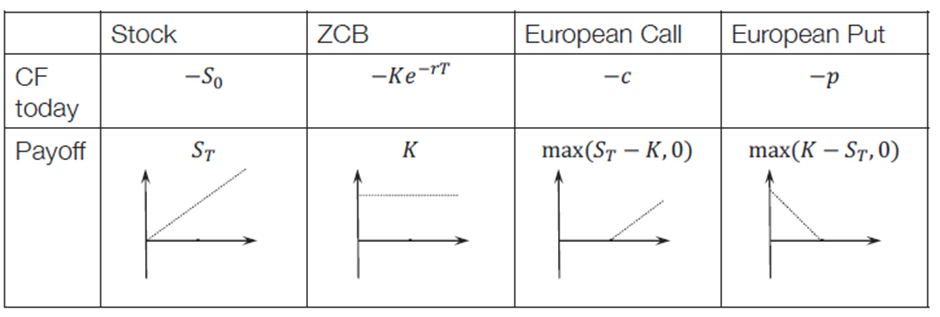

### 3. Assumptions Made 

One-Period Binomial Tree
-	Assumes price of underlying follows binomial distribution
-	Asset price can only move up or down by a specified amount
-   Volatility does not change


<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Simple Binomial model
today's fair price of a derivative is equal to the expected value of its future payoff discounted by the risk free rate. <br>
Create option pricing using binomial trees and <b> power lookback puts </b> with the python file. and possibly draw out the tree diagram.

In [1]:
%matplotlib inline
# necessary 
import pandas as pd
import numpy as np
import finoptions as fo  
import math as math

# graphing models
import matplotlib.pyplot as plt
import seaborn as sns

# statistical models
from scipy import stats 
import statsmodels.api as sm

# time measurement
import time

start = time.time()

u = $e^{rt + \sigma\sqrt(\vartriangle t)}$ <br>
d = $e^{rt - \sigma\sqrt(\vartriangle t)}$ <br>
where up and down factors are u and d respectively , r is the risk-neutral rate , $\sigma$ is the volatility, t is the length of the time step in years. <br>
It never violates the no arbitrage restriction : d < $e^{rt}$ < u <br>
The standard deviation of the return in a short time period $\vartriangle$ t is $\approx$ $\sigma\sqrt\vartriangle t$ <br>

q = $\frac{e^{rt}-d}{u-d}$ <br>
1-q = $\frac{u-e^{rt}}{u-d}$ <br>
where Risk Neutral probabilities of up and down movements of the stock price are q and 1-q respectively. <br>

Max [ ($S_{n}$ − K), 0 ], for a call option, <br>
Max [ (K − $S_{n}$), 0 ], for a put option,

In [2]:
# n is time periods,
# K is strike price,
# S is starting price, 
# r is interest rate,
# b is annualised cost of carry rate,
# t is the time to maturity measured in years e.g. 0.5 means 6 months.
# the value above each point is the option value given by the formula
class option():
    def __init__(
        self,
        r: float,
        t: float,
        sigma: float,
    ):
        self.r = r
        self.t = t
        self.sigma = sigma
    
    def up(self):
        self.up = np.exp(self.r*self.t+self.sigma*np.sqrt(self.t))
        return self.up

    def down(self):
        self.down = np.exp(self.r*self.t-self.sigma*np.sqrt(self.t))
        return self.down

    def q(self):
        self.q = ( np.exp(self.r*self.t)-np.exp(self.r*self.t-self.sigma*np.sqrt(self.t)) ) / ( np.exp(self.r*self.t+self.sigma*np.sqrt(t)) - np.exp(self.r*self.t-self.sigma*np.sqrt(self.t)) )
        return self.q

option1 = option(0.1,6/12,0.1)

print("upper price is :",10*option1.up())
print("lower price is :",10*option1.down())

upper price is : 11.282984237167975
lower price is : 9.795023150303054


<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Creating a Trinomial Graph model from scratch

In [ ]:
# The trinomial tree is constructed using the two zigzag patterns

plt.figure(figsize=(20,10))
plt.xlabel("n", fontsize=15)
plt.ylabel("Option Value", fontsize=15)
plt.title("Trinomial Option Tree", fontsize=int(15))

x = [1,0,1,0,1]
y = [1,0,0,0,-1]
plt.plot(x,y)

# 
for i in range(9):
    # zig zag pattern 1
    x = [2,1,2,1,2,1,2]
    y = [0]*(7+4*i)    
    for j in range(i):
        x.append(1)
        x.append(2)
        x.append(1)
        x.append(2)
    x = np.array(x) + i
    
    for k in range(len(y)):
        y[k] = (i+2) - math.floor((k+1)/2)
    
    plt.plot(x,y,"bo-")
    pts1 = list(zip(x, y))

    
    # zig zag pattern 2
    x = [1,2,1,2,1,2]
    y = [0]*(6+4*i)
    for j in range(i):
        x.append(1)
        x.append(2)
        x.append(1)
        x.append(2)
    x = np.array(x) + i

    for k in range(len(y)):
        y[k] = (i+1) - math.floor((k+1)/2)

    plt.plot(x,y,"bo-")
    pts2 = list(zip(x, y))


### Testing annotation of points (WIP)


[(1, 1), (0, 0), (1, -1)]
[(2, 2), (1, 1), (2, 0), (1, -1), (2, -2)]


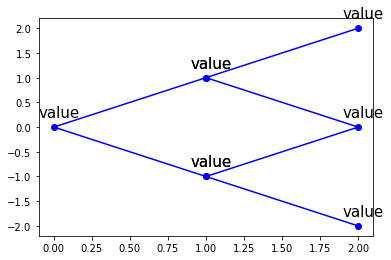

In [92]:
for i in range(2):
    x = [1, 0, 1]
    for j in range(i):
        x.append(0)
        x.append(1)
    x = np.array(x) + i
    y = np.arange(-(i + 1), i + 2)[::-1]    
    plt.plot(x, y, "bo-")

    pts = list(zip(x, y))
    print(pts)

    for p in pts:
        plt.annotate("value", xy=p, xytext=(p[0] - 0.1, p[1] + 0.2), fontsize=15)   

<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Example Trinomial tree from finoptions

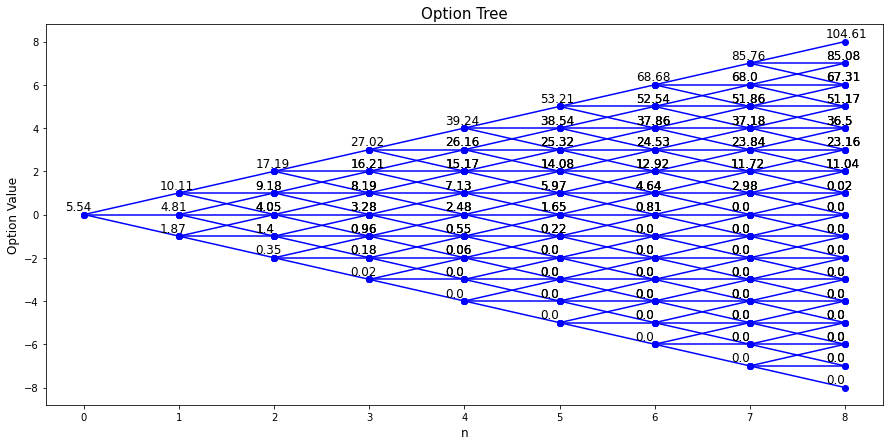

In [31]:
opt =fo.binomial_tree_options.TrinomialTreeOption(S=100, K=110, t=0.5, r=0.1, b=0.1, sigma=0.27, n=8, type='european')
opt.plot(figsize=(15,7));

<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

<b>Types of Common Exotic Options  </b>

- Asian: The payoff is determined by the average price of underlying assets over a preset period
- Forward Start - A forward on an option except that the premium is paid today
- Compound - An option on an option
- Chooser - Investor can choose whether the option will become a call or a put by a specified choice date
- Barrier - 4 combinations – Up & Out, Down & Out, Up & In, Down & In
- Binary - Pays a predetermined amount or nothing
- Rainbow - Payoff depends on the best or the worst of the two or more risky assets
- Swaption - An option giving the right to enter into an underlying swap agreement

In [93]:
#Asian option pricing
import itertools 
from itertools import product
import numpy  as np
risk_free = 0.05
spot = 50
volatility = 0.2
T = 1/40
steps = 10
Up = 1.063857756
Down = 0.947841144

x = [list(tup) for tup in itertools.product([Up, Down], repeat=steps)] # all possible combinations of up and down in different positions

# x is the list of all combinations of ups and downs
for i in range(2**steps):
    x[i][0] = spot *x[i][0]
    for j in range(1,10):
        x[i][j] = x[i][j]*x[i][j-1]
        j+=1

# add 50 to start of list
finalised_list = list(x)
for i in range(len(finalised_list)):
    finalised_list[i] = [50]+finalised_list[i]

#print(finalised_list) to verify 
for i in range(len(finalised_list)):
    finalised_list[i] = max(finalised_list[i]) - finalised_list[i][-1]

# finalised list is now payoffs from each combination

sum_list = sum(finalised_list)
print("total payoff is:",sum_list)

# price of put option
print("average payoff is:",sum_list/(2**steps))

print("Priceof Asian option is:", sum_list/(2**steps))

total payoff is: 5324.348005300049
average payoff is: 5.1995585989258295
Priceof Asian option is: 5.1995585989258295


<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

| Index | Documentation  |
|--------------|------|
|   Pandas     | https://pandas.pydata.org/pandas-docs/stable/reference/|
|   Numpy      | https://numpy.org/doc/1.24/reference/index.html|
|   Scipy      | https://docs.scipy.org/doc/scipy/reference/stats.html|
|   Statsmodels| https://www.statsmodels.org/stable/api.html|
|   Plotly     | https://plotly.com/python/time-series/ |
|   Latex      | https://www.overleaf.com/learn/latex/Subscripts_and_superscripts |
|   ete3       | http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html |
|   fOptions   | https://rdrr.io/rforge/fOptions/ |


Some ideas from using the tests:
-  distribution of stock prices and returns
-  distribution of option prices
-  show that they are conditional moments suitable for prices and returns

References:
<nav>
<a href=https://www.statology.org/central-limit-theorem>Central Limit Theorem</a> |
<a href=https://pbpython.com/monte-carlo.html>Monte Carlo</a> |
<a href=https://python-bloggers.com/2020/11/law-of-large-numbers-and-the-central-limit-theorem-with-python>Law of Large Numbers</a> |
<a href=https://letianzj.github.io/portfolio-management-one.html#more>Portfolio Optimisation</a> |


</nav> 

<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">